In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('/Users/ethanchoi/Desktop/NBA Prediction Model/Points Test 1.csv')

In [54]:
df.head()

,Rk,Player,Tm,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,198.0,Aaron Gordon,DEN,15.0,22.0,19.6,112.8,31.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,244.0,Aaron Holiday,PHO,6.3,5.2,4.7,114.8,16.2,16.9,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,406.0,Aaron Nesmith,BOS,3.8,6.0,6.4,108.9,11.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,581.0,Aaron Wiggins,OKC,8.3,17.0,13.8,109.5,24.2,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,403.0,Abdel Nader,PHO,2.4,2.4,2.4,114.8,10.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df = df[['Season PPG', 'Last 5 PPG', 'Last 10 PPG', 'Opp DR', 'Season MP', 'Projected MP Today', "Today's Points"]]

In [56]:
df

,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points
0,15.0,22.0,19.6,112.8,31.7,0.0,0.0
1,6.3,5.2,4.7,114.8,16.2,16.9,10.0
2,3.8,6.0,6.4,108.9,11.0,11.0,5.0
3,8.3,17.0,13.8,109.5,24.2,0.0,0.0
4,2.4,2.4,2.4,114.8,10.4,0.0,0.0
...,...,...,...,...,...,...,...
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df = df.dropna()

In [58]:
df.corr()

,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points
Season PPG,1.000000,0.574750,0.695494,0.023763,0.872058,-0.002441,0.036514
Last 5 PPG,0.574750,1.000000,0.869852,0.049341,0.454559,0.371274,0.472908
Last 10 PPG,0.695494,0.869852,1.000000,-0.000160,0.569032,0.257269,0.337169
Opp DR,0.023763,0.049341,-0.000160,1.000000,0.026324,0.112673,0.083894
Season MP,0.872058,0.454559,0.569032,0.026324,1.000000,0.058460,0.011068
Projected MP Today,-0.002441,0.371274,0.257269,0.112673,0.058460,1.000000,0.774987
Today's Points,0.036514,0.472908,0.337169,0.083894,0.011068,0.774987,1.000000


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop("Today's Points", axis=1).values
y = df["Today's Points"].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
X_train.shape

(306, 6)

In [63]:
X_test.shape

(132, 6)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
scaler.fit(X_train)

MinMaxScaler()

In [67]:
X_train = scaler.transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
X_train.max()

1.0

In [70]:
X_train.min()

0.0

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
10/10 [==============================] - 0s 11ms/step - loss: 131.6756 - val_loss: 113.4270
Epoch 2/600
10/10 [==============================] - 0s 4ms/step - loss: 130.9156 - val_loss: 112.8151
Epoch 3/600
10/10 [==============================] - 0s 4ms/step - loss: 130.2974 - val_loss: 112.3325
Epoch 4/600
10/10 [==============================] - 0s 3ms/step - loss: 129.7476 - val_loss: 111.8760
Epoch 5/600
10/10 [==============================] - 0s 5ms/step - loss: 129.1967 - val_loss: 111.3201
Epoch 6/600
10/10 [==============================] - 0s 5ms/step - loss: 128.5058 - val_loss: 110.5612
Epoch 7/600
10/10 [==============================] - 0s 4ms/step - loss: 127.5698 - val_loss: 109.5949
Epoch 8/600
10/10 [==============================] - 0s 4ms/step - loss: 126.4022 - val_loss: 108.3426
Epoch 9/600
10/10 [==============================] - 0s 4ms/step - loss: 124.8671 - val_loss: 106.7340
Epoch 10/600
10/10 [==============================] - 0s 4ms/step - loss

10/10 [==============================] - 0s 3ms/step - loss: 22.9111 - val_loss: 17.9401
Epoch 82/600
10/10 [==============================] - 0s 3ms/step - loss: 22.6735 - val_loss: 17.8657
Epoch 83/600
10/10 [==============================] - 0s 3ms/step - loss: 22.6040 - val_loss: 17.8044
Epoch 84/600
10/10 [==============================] - 0s 3ms/step - loss: 22.6381 - val_loss: 17.7637
Epoch 85/600
10/10 [==============================] - 0s 3ms/step - loss: 22.4393 - val_loss: 17.6769
Epoch 86/600
10/10 [==============================] - 0s 3ms/step - loss: 22.1200 - val_loss: 17.6496
Epoch 87/600
10/10 [==============================] - 0s 3ms/step - loss: 22.0934 - val_loss: 17.6444
Epoch 88/600
10/10 [==============================] - 0s 3ms/step - loss: 21.8108 - val_loss: 17.5200
Epoch 89/600
10/10 [==============================] - 0s 4ms/step - loss: 21.7137 - val_loss: 17.4567
Epoch 90/600
10/10 [==============================] - 0s 5ms/step - loss: 21.5934 - val_loss: 1

Epoch 161/600
10/10 [==============================] - 0s 4ms/step - loss: 16.5800 - val_loss: 16.1899
Epoch 162/600
10/10 [==============================] - 0s 3ms/step - loss: 16.4601 - val_loss: 16.1261
Epoch 163/600
10/10 [==============================] - 0s 3ms/step - loss: 16.4850 - val_loss: 16.1669
Epoch 164/600
10/10 [==============================] - 0s 3ms/step - loss: 16.5115 - val_loss: 16.1332
Epoch 165/600
10/10 [==============================] - 0s 3ms/step - loss: 16.4282 - val_loss: 16.1956
Epoch 166/600
10/10 [==============================] - 0s 3ms/step - loss: 16.4406 - val_loss: 16.1603
Epoch 167/600
10/10 [==============================] - 0s 3ms/step - loss: 16.6214 - val_loss: 16.3237
Epoch 168/600
10/10 [==============================] - 0s 3ms/step - loss: 16.3759 - val_loss: 16.1946
Epoch 169/600
10/10 [==============================] - 0s 3ms/step - loss: 16.3585 - val_loss: 16.1730
Epoch 170/600
10/10 [==============================] - 0s 5ms/step - loss

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,predictions)

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
model.evaluate(X_train, y_train, verbose=0)

In [ ]:
predictions

In [ ]:
predictions = pd.Series(predictions.reshape(132,))

In [ ]:
predictions

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df=pd.concat([pred_df,predictions],axis=1)

In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
pred_df

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

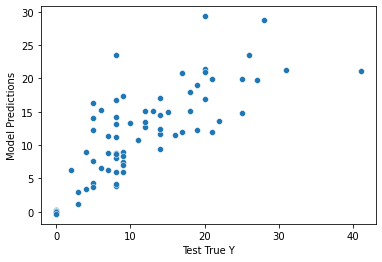

In [47]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)